### Question 1
Put the following function in the general from of quadratic functions: 
 :

Q(x) =(1/2)x<sup>T</sup> Ax + b<sup>T</sup> x + c <br>

Q(x) = 2x<sup>2</sup><sub>1</sub> + 3x<sup>2</sup><sub>2</sub> + 3x<sub>1</sub>x<sub>2</sub> + 0.5x<sub>1</sub> + 0.5x<sub>2</sub>

### solution
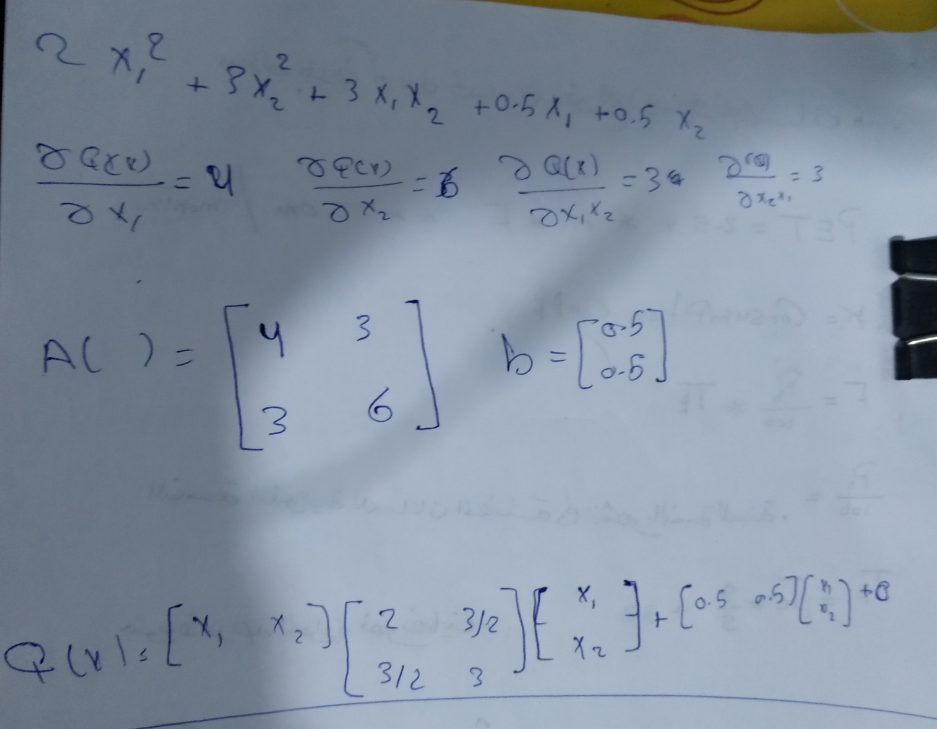

### Question 2
Let Q(x) = (1/2)x<sup>T</sup> Ax + b<sup>T</sup> x + c <br>
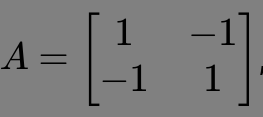, b = 0 c = 0

Plot the surface and the 2D contour lines of Q(x) in the same figure (side by 
side) - in the range **[−4, 4]** in both the and axes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Q(x):
    x1 = x[0]
    x2 = x[1]
    return .5 * x1**2 + .5 *x2**2 - x1*x2

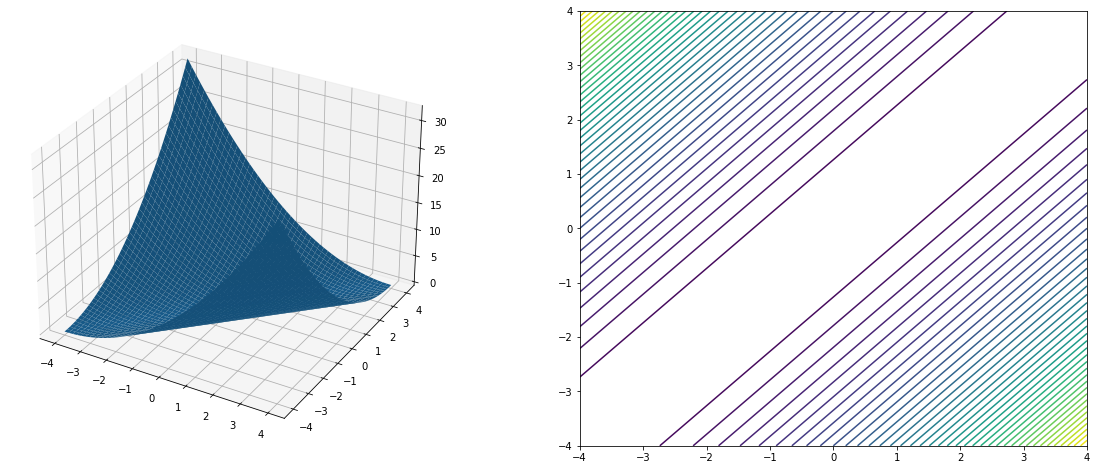

In [3]:
%matplotlib inline  
LB = -4
UB = 4
x = np.linspace(LB, UB, 50)
y = np.linspace(LB, UB, 50)
X, Y = np.meshgrid(x, y)
Z = Q([X, Y])

#surface
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z)
#2D contour lines
ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, levels=50)

plt.show()

### Question 3
Let be as follows:
F(x, y) = (x<sup>2</sup> + y − 11)<sup>2</sup> + (x + y<sup>2</sup> − 7)<sup>2</sup> <br>
Find a minimum of the previous function starting from point (4, −4) using the 
following methods in the minimize function (of scipy.optimize module):
1. Powell's method
2. Conjugate Gradient
3. BFGS <br>
Plot the 2D contour of the function and the path starting from the given initial 
point to the minimum for range **[−5, 5]** in both and axes. <br>For the Conjugate 
Gradient and BFGS methods, send the minimize function a callable to the 
gradient of the given function. Print the found minima, number of iterations and 
number of function evaluations for each method.

### import

In [4]:
from scipy.optimize import minimize

#### prepare the Data

In [5]:
def F(x):
    return (x[0]**2 + x[1] -11)**2 + (x[0] + x[1]**2 -7)**2

def dF(x):
    return  (4*x[0]**3 + 4*x[0]*x[1] - 42*x[0] + 2*x[1]**2 -14 , 4*x[1]**3 + 4*x[1]*x[0] -26*x[1] + 2*x[0]**2 - 22)

starting_point = np.array([4, -4])


LB = -5
UB = 5

x = np.linspace(LB, UB, 50)
y = np.linspace(LB, UB, 50)

X, Y = np.meshgrid(x, y)

Z = F([X, Y])

#### 1.Powell's method

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 151
found minimum[ 3.58442834 -1.84812653]


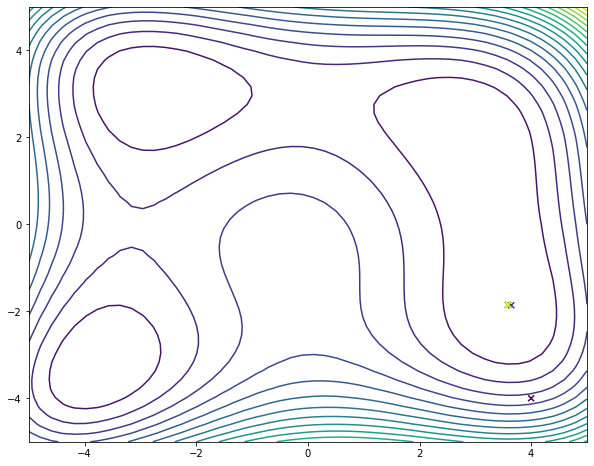

In [6]:
res = minimize(F, starting_point, method='Powell', options={'disp':True, 'return_all':True})
#path
xs = res.allvecs

#found minima
print(f"found minimum{res.x}")

#plot 
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax1.contour(X, Y, Z, levels=20)
ax1.scatter([x[0] for x in xs], [x[1] for x in xs], c=list(range(len(res.allvecs))), marker='x')

plt.show()

#### 2.Conjugate Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 22
         Gradient evaluations: 22
found minimum[3. 2.]


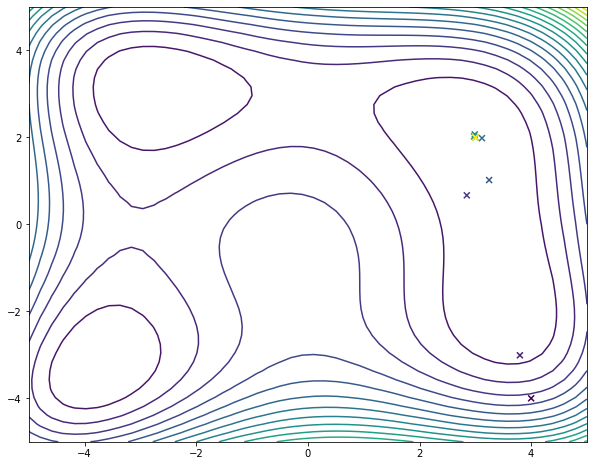

In [7]:
res = minimize(F, starting_point, method='CG',jac = dF, options={'disp':True, 'return_all':True })
#path
xs = res.allvecs

#found minima
print(f"found minimum{res.x}")

#plot
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax1.contour(X, Y, Z, levels=20)
ax1.scatter([x[0] for x in xs], [x[1] for x in xs], c=list(range(len(res.allvecs))), marker='x')

plt.show()

#### 3.BFGS

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
found minimum[ 3.58442835 -1.84812653]


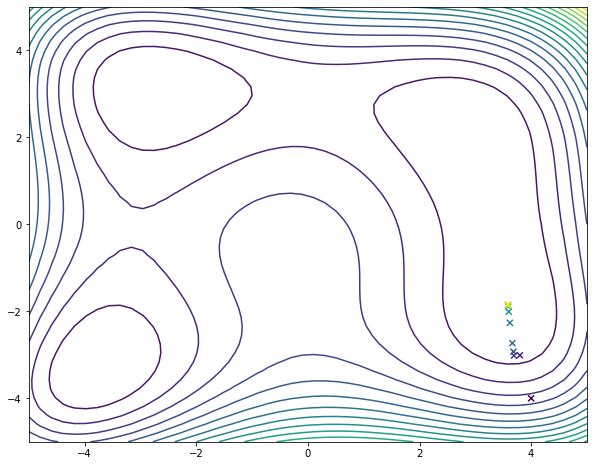

In [8]:
res = minimize(F, starting_point, method='BFGS',jac = dF, options={'disp':True, 'return_all':True })
#path
xs = res.allvecs

#found minima
print(f"found minimum{res.x}")

#plot
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
ax1.contour(X, Y, Z, levels=20)
ax1.scatter([x[0] for x in xs], [x[1] for x in xs], c=list(range(len(res.allvecs))), marker='x')

plt.show()

### Extra for me to study later 

import 

In [9]:
from time import time
from statistics import mean


stats with using jac
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 22
         Gradient evaluations: 22
using jac time 0.001513340711593628
found minimum[3. 2.]
stats without using jac
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 66
         Gradient evaluations: 22
without using jac time 0.004179944038391113
percentage diff =  176.20640919581226 %


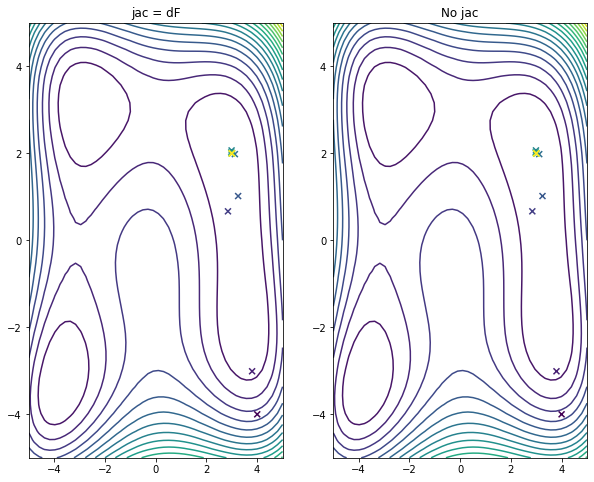

In [10]:
#what is the diff between using the df and not using it ?
#using it

print('stats with using jac')
res1 = minimize(F, starting_point, method='CG',jac = dF, options={'disp':True, 'return_all':True })

usingJacTime = []
for i in range(1000):
    jacSTime = time()
    minimize(F, starting_point, method='CG',jac = dF)
    jacFTime = time()
    usingJacTime.append(jacFTime - jacSTime)

                                                        
print('using jac time',mean(usingJacTime))

#path
xs1 = res1.allvecs

#found minima
print(f"found minimum{res1.x}")
#plot
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(121)
ax1.contour(X, Y, Z, levels=20)
ax1.scatter([x[0] for x in xs1], [x[1] for x in xs1], c=list(range(len(res1.allvecs))), marker='x')
ax1.title.set_text("jac = dF")


# with no jac 
print('stats without using jac')
res2 = minimize(F, starting_point, method='CG', options={'disp':True, 'return_all':True })

withoutusingJacTime = []
for i in range(1000):
    NojacSTime = time()
    minimize(F, starting_point, method='CG')
    NojacFTime = time()
    withoutusingJacTime.append(NojacFTime - NojacSTime)

print('without using jac time',mean(withoutusingJacTime))
#path
xs2 = res2.allvecs
#plot
ax1 = fig.add_subplot(122)
ax1.contour(X, Y, Z, levels=20)
ax1.scatter([x[0] for x in xs2], [x[1] for x in xs2], c=list(range(len(res.allvecs))), marker='x')
ax1.title.set_text("No jac")

print("percentage diff = ",(mean(withoutusingJacTime) - mean(usingJacTime))/mean(usingJacTime)*100,"%")
plt.show()

stats with using jac
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
using jac time 0.0014072031974792481
found minimum[ 3.58442835 -1.84812653]
stats without using jac
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 45
         Gradient evaluations: 15
without using jac time 0.003228729248046875
percentage diff =  129.4430011124594 %


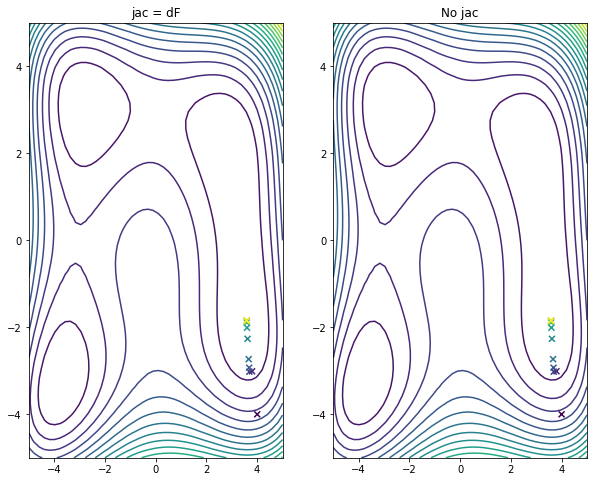

In [20]:
#what is the diff between using the df and not using it ?
#using it

print('stats with using jac')
res1 = minimize(F, starting_point, method='BFGS',jac = dF, options={'disp':True, 'return_all':True })

usingJacTime = []
for i in range(1000):
    jacSTime = time()
    minimize(F, starting_point, method='BFGS',jac = dF)
    jacFTime = time()
    usingJacTime.append(jacFTime - jacSTime)

                                                        
print('using jac time',mean(usingJacTime))

#path
xs3 = res1.allvecs

#found minima
print(f"found minimum{res1.x}")
#plot
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(121)
ax1.contour(X, Y, Z, levels=20)
ax1.scatter([x[0] for x in xs3], [x[1] for x in xs3], c=list(range(len(res1.allvecs))), marker='x')
ax1.title.set_text("jac = dF")


# with no jac 
print('stats without using jac')
res2 = minimize(F, starting_point, method='BFGS', options={'disp':True, 'return_all':True })

withoutusingJacTime = []
for i in range(1000):
    NojacSTime = time()
    minimize(F, starting_point, method='BFGS')
    NojacFTime = time()
    withoutusingJacTime.append(NojacFTime - NojacSTime)

print('without using jac time',mean(withoutusingJacTime))
#path
xs4 = res2.allvecs
#plot
ax1 = fig.add_subplot(122)
ax1.contour(X, Y, Z, levels=20)
ax1.scatter([x[0] for x in xs4], [x[1] for x in xs4], c=list(range(len(res.allvecs))), marker='x')
ax1.title.set_text("No jac")

print("percentage diff = ",(mean(withoutusingJacTime) - mean(usingJacTime))/mean(usingJacTime)*100,"%")
plt.show()

#### compare the path for each one 

In [12]:
xs1

[array([ 4., -4.]),
 array([ 3.79822864, -3.0103595 ]),
 array([2.84652685, 0.66777643]),
 array([3.24701945, 1.01877028]),
 array([3.11823647, 1.98245386]),
 array([2.98950665, 2.06816694]),
 array([2.97720904, 2.02249625]),
 array([3.00005691, 2.000567  ]),
 array([2.99993383, 2.00006484]),
 array([2.99999934, 1.99999766]),
 array([3.00000062, 1.9999989 ]),
 array([3., 2.])]

In [13]:
(np.around(np.array(xs1),5) == np.around(np.array(xs2),5)).all()

True

In [14]:
(np.around(np.array(xs3),5) == np.around(np.array(xs4),5)).all()

True

when they are the same method it appears that the path is the same yet the time is diffrent and Function evaluations is diffrent 

#### why the CG got me some diffrent value and not the same as the BFGS or powel ?

In [15]:
xs1

[array([ 4., -4.]),
 array([ 3.79822864, -3.0103595 ]),
 array([2.84652685, 0.66777643]),
 array([3.24701945, 1.01877028]),
 array([3.11823647, 1.98245386]),
 array([2.98950665, 2.06816694]),
 array([2.97720904, 2.02249625]),
 array([3.00005691, 2.000567  ]),
 array([2.99993383, 2.00006484]),
 array([2.99999934, 1.99999766]),
 array([3.00000062, 1.9999989 ]),
 array([3., 2.])]

In [16]:
xs3

[array([ 4., -4.]),
 array([ 3.79822864, -3.0103595 ]),
 array([ 3.69177154, -3.01915111]),
 array([ 3.68300446, -2.92804213]),
 array([ 3.66379041, -2.73144449]),
 array([ 3.61945572, -2.26389338]),
 array([ 3.59791714, -2.00900156]),
 array([ 3.58781865, -1.8869343 ]),
 array([ 3.58483039, -1.85249061]),
 array([ 3.58444185, -1.8482559 ]),
 array([ 3.58442851, -1.84812696]),
 array([ 3.58442835, -1.84812653])]

In [17]:
(np.around(np.array(xs1),5) == np.around(np.array(xs3),5))

array([[ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

it appears that in the CG with the second iteration it jumped away from the nearest local min and that made it go to another place with also local min there 

but why it jumped there ????


In [18]:
xs = np.array([xs1[-1][0] , xs3[-1][0]])
ys = np.array([xs1[-1][1], xs3[-1][1]])
zs = F([xs,ys])

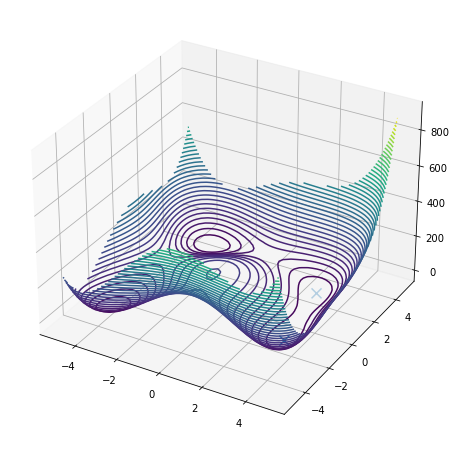

In [19]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.contour3D(X, Y, Z, levels=50)
ax1.scatter(xs, ys,s = 100 ,marker='x')
plt.show()